https://www.kaggle.com/c/data-science-london-scikit-learn

In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
import re
import datetime as dt
import matplotlib.pyplot as plt
#为了整数相除自动变小数，不round
from __future__ import division
from sklearn.decomposition.pca import PCA
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GMM
plt.rc('figure', figsize=(13, 7))
plt.style.use('ggplot')
def headtail(df, n = 5):
    print df.shape
    return df.head(n).append(df.tail(n))
import sys
print(sys.version)
print(pd.__version__)
print(np.__version__)

Populating the interactive namespace from numpy and matplotlib
2.7.9 |Anaconda 2.2.0 (64-bit)| (default, Dec 18 2014, 16:57:52) [MSC v.1500 64 bit (AMD64)]
0.15.2
1.9.2


In [2]:
X_test = pd.read_csv('test.csv', header=None)
Y = pd.read_csv('trainLabels.csv', header=None)
X = pd.read_csv('train.csv', header=None)

In [5]:
Y = Y[0]

In [3]:
headtail(X)

(1000, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217
999,0.228994,-0.085453,0.876582,1.057401,-1.404015,-1.091965,0.639176,0.701332,-0.906577,-0.390940,...,0.471415,1.024757,-1.796571,0.603161,0.862705,0.747234,3.275681,0.400372,-3.431031,2.370080


In [6]:
headtail(Y)

(1000L,)


0      1
1      0
2      0
3      1
4      0
995    0
996    1
997    1
998    0
999    0
Name: 0, dtype: int64

In [41]:
X_des = X.describe()
X_des

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


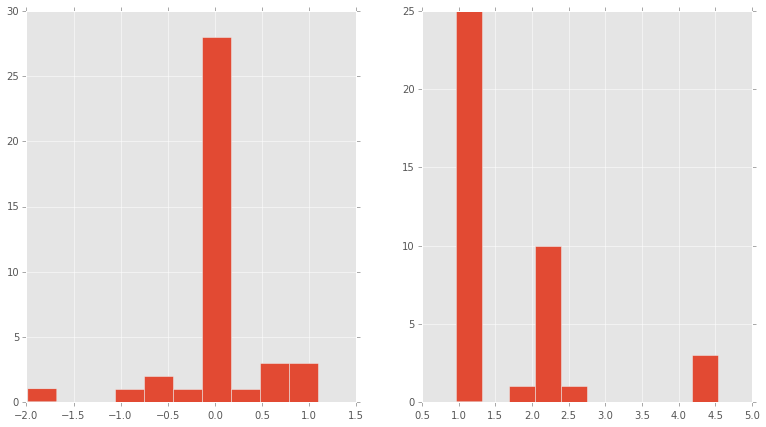

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2)

X_des.loc['mean'].hist(ax=axes[0])
X_des.loc['std'].hist(ax=axes[1])

In [43]:
Y.ravel()[:100]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

### 直接SVM裸fit

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [18]:
from sklearn.metrics import make_scorer

In [8]:
def single_run_score(X, Y, classifier):
    y = label_binarize(Y, classes=[0, 1])
    y_score = classifier.fit(X, y).decision_function(X)
    return roc_auc_score(y.ravel(), y_score.ravel(), average='micro')

In [9]:
def single_run(X, Y, classifier):
    y = label_binarize(Y, classes=[0, 1])
    y_score = classifier.fit(X, y).decision_function(X)
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    threshold = dict()
    roc_auc = dict()
    for i in range(y.shape[1]):
        fpr[i], tpr[i], threshold[i] = roc_curve(y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], threshold['micro'] = roc_curve(y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    
    
    ##############################################################################
    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()    
        
    return y, y_score

In [10]:
def cv_run_score(X, Y, classifier):
    y = label_binarize(Y, classes=[0, 1])
    
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(Y, n_folds=5, random_state=np.random.RandomState(0))#, shuffle=True)

    mean_auc = 0.0
    for i, (train, test) in enumerate(cv):
        y_score = classifier.fit(X.iloc[train], y[train]).decision_function(X.iloc[test])
        # Compute ROC curve and area the curve
        auc = roc_auc_score(y[test].ravel(), y_score.ravel(), average='micro')
        mean_auc += auc
        print auc,

    mean_auc /= len(cv)    
    return mean_auc

In [11]:
def cv_run(X, Y, classifier):
    y = label_binarize(Y, classes=[0, 1])
    
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(Y, n_folds=5, random_state=np.random.RandomState(0))#, shuffle=True)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train, test) in enumerate(cv):
        y_score = classifier.fit(X.iloc[train], y[train]).decision_function(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), y_score.ravel())
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        print i,

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Cross Validation ROC curve')
    plt.legend(loc="lower right")
    plt.show()    
    
    return y, y_score

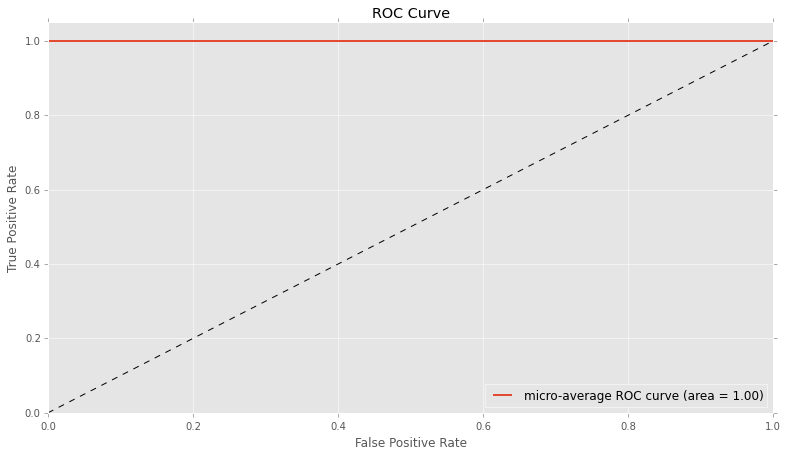

1.0


In [12]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, C=100, gamma=1000,
                                         random_state=np.random.RandomState(0)))
y, y_score = single_run(X, Y, classifier)
print single_run_score(X, Y, classifier)

0 1 2 3 4

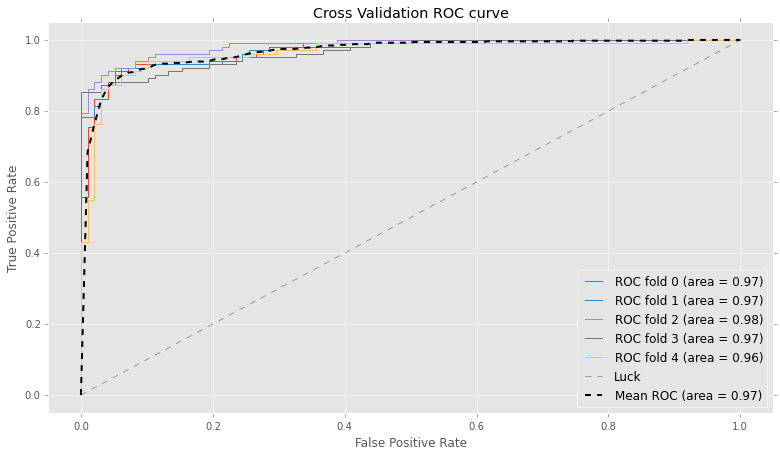

 0.96868747499 0.971088435374 0.983693477391 0.967486994798 0.962484993998 0.97068827531


In [66]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, C=8, gamma=0.0078125,
                                         random_state=np.random.RandomState(0)))
y, y_score = cv_run(X, Y, classifier)
print cv_run_score(X, Y, classifier)

0 1 2 3 4

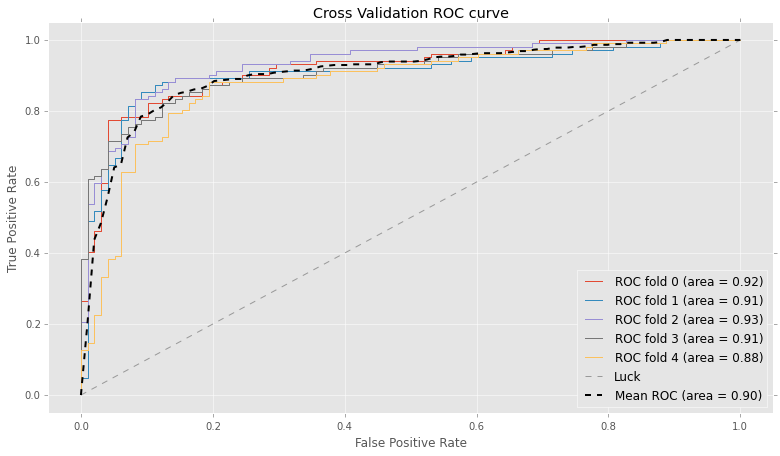

 0.917967186875 0.906262505002 0.931172468988 0.908463385354 0.878351340536 0.908443377351


In [13]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, C=0.01, gamma=0.0,
                                         random_state=np.random.RandomState(0)))
y, y_score = cv_run(X, Y, classifier)
print cv_run_score(X, Y, classifier)

In [7]:
def test_svm(C_svm, gamma_svm):
    k_fold = cross_validation.KFold(len(X), n_folds=10)
    scores = []
    for train_indices, test_indices in k_fold:
        svc = svm.SVC(C=C_svm, kernel='rbf', gamma=gamma_svm)
        svc.fit(X.values[train_indices], y.values.ravel()[train_indices])
        score = svc.score(X.values[test_indices], y.values.ravel()[test_indices])
        scores.append(score)
    #print scores
    return sum(scores)/len(scores)

In [59]:
# 直接用cv_score更简单
def test_svm(C_svm, gamma_svm):
    svc = svm.SVC(C=C_svm, kernel='rbf', gamma=gamma_svm)
    scores = cross_val_score(svc, X.values, y.ravel(),cv=10)
    return sum(scores)/len(scores)

In [64]:
# 用GridSearchCV来代替手动grid search
# param_grid = {'estimator__C' : [2 **i for i in range(-5,17,2)], 'estimator__gamma' : [2 **i for i in xrange(-15,5,2)], 'estimator__kernel' : ['rbf']}
param_grid = {'estimator__C' : [8], 'estimator__gamma' : [0.0078125], 'estimator__kernel' : ['rbf']}
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=np.random.RandomState(0)))
scorer = make_scorer(roc_auc_score, average='micro', greater_is_better=True, needs_threshold=True)
grid_search = GridSearchCV(classifier, param_grid=param_grid, verbose=2, scoring=scorer,cv=5,n_jobs=1).fit(X.values, Y.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 
[CV]  estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 -   0.1s
[CV] estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 
[CV]  estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 -   0.1s
[CV] estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 
[CV]  estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 -   0.1s
[CV] estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 
[CV]  estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 -   0.1s
[CV] estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 
[CV]  estimator__kernel=rbf, estimator__C=8, estimator__gamma=0.0078125 -   0.1s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [65]:
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.971 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 8, 'estimator__gamma': 0.0078125}



In [55]:
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.971 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 8, 'estimator__gamma': 0.0078125}

Model with rank: 2
Mean validation score: 0.970 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 32, 'estimator__gamma': 0.0078125}

Model with rank: 3
Mean validation score: 0.970 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 128, 'estimator__gamma': 0.0078125}

Model with rank: 4
Mean validation score: 0.970 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 512, 'estimator__gamma': 0.0078125}

Model with rank: 5
Mean validation score: 0.970 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 2048, 'estimator__gamma': 0.0078125}

Model with rank: 6
Mean validation score: 0.970 (std: 0.007)
Parameters: {'estimator__kernel': 'rbf', 'estimator__C': 8192, 'estimator__gamma': 0.0078125}

Model with rank: 7
Mean validation score: 0.970 (std: 0.007)
Parameters

In [67]:
[1,2,3] + [0]

[1, 2, 3, 0]

In [ ]:
# 用GridSearchCV来代替手动grid search
param_grid = {'C' : arange(0.5,3.5,0.1), 'gamma' : arange(0.0,0.01,0.001), 'kernel' : ['rbf']}
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid=param_grid, verbose=2,scoring='accuracy',cv=10).fit(X.values, y.ravel())

In [16]:
def report(grid_scores, n_top=10):
    sorted_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(sorted_scores):
        print "Model with rank: %d" % (i + 1)
        print "Mean validation score: %.3f (std: %.3f)" % (
              score.mean_validation_score,
              np.std(score.cv_validation_scores))
        print "Parameters: %s\n" % (score.parameters)

In [11]:
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.922 (std: 0.021)
Parameters: {'kernel': 'rbf', 'C': 1.6999999999999997, 'gamma': 0.0}

Model with rank: 2
Mean validation score: 0.922 (std: 0.021)
Parameters: {'kernel': 'rbf', 'C': 1.7999999999999998, 'gamma': 0.0}

Model with rank: 3
Mean validation score: 0.922 (std: 0.020)
Parameters: {'kernel': 'rbf', 'C': 1.8999999999999997, 'gamma': 0.0}

Model with rank: 4
Mean validation score: 0.922 (std: 0.020)
Parameters: {'kernel': 'rbf', 'C': 1.9999999999999996, 'gamma': 0.0}

Model with rank: 5
Mean validation score: 0.922 (std: 0.020)
Parameters: {'kernel': 'rbf', 'C': 2.0999999999999996, 'gamma': 0.0}



In [12]:
test_svm(2.0,0.0)

0.92199999999999993

In [60]:
test_svm(8.0,0.0078125)

0.91300000000000003

In [13]:
# 找出来的最优参数：C=2.0, gamma=0.0
svc = svm.SVC(C=2.0, kernel='rbf', gamma=0.0)
svc.fit(X.values, y.values.ravel())
result = svc.predict(X_test.values)
print result.shape
df = DataFrame(result,index=range(1,9001),columns=['Solution'])
df.index.name = 'Id'
df.to_csv('pureSVM.csv')

(9000L,)


In [363]:
# 0.91973

###PCA

In [137]:
# 用完整的数据集做feature engineering
X_all=X.append(X_test)

In [86]:
pca = PCA(n_components=5,whiten=True)
pca.fit(X_all)
print pca.explained_variance_ratio_
print pca.components_[0]
print pca.components_[1]

[ 0.26133889  0.20395397  0.0791104   0.04814801  0.04541674]
[ -2.04156669e-04  -8.28921287e-05   4.89017393e-04   1.76093188e-04
   1.13737145e-01  -3.47982436e-04  -1.33343252e-02  -2.23568121e-04
   4.76608795e-04  -7.89909972e-05   8.60047736e-05  -6.86555710e-05
  -1.73567914e-02  -3.23433263e-04   4.80890352e-03  -1.99086180e-04
   3.44468456e-04  -1.68286460e-04   6.46679763e-03  -8.81655812e-05
   6.58608982e-04  -6.20642692e-04   3.06351772e-02   9.83519948e-02
  -2.32565299e-04  -3.02139342e-04  -1.42387764e-04  -1.18747375e-05
  -2.71920913e-02  -2.94135954e-02  -1.11113324e-04  -4.20889431e-04
  -2.46413523e-02   4.10153822e-04  -3.73352181e-03   1.89910110e-04
   7.24236918e-03   8.62569796e-05  -1.29551403e-02  -2.07840588e-02]
[  5.63721424e-04  -5.25019001e-04  -5.61843915e-04   1.09688651e-04
   1.75040130e-02  -2.53186295e-04   2.89992655e-02   5.08295433e-03
   1.85414961e-05   1.35168545e-04   2.13577752e-04   7.66465936e-04
  -1.51705046e-01   2.56379105e-04  -2.7

In [87]:
pca2 = PCA(n_components=5,whiten=False)
pca2.fit(X_all)
print pca2.explained_variance_ratio_
print pca2.components_[0]
print pca2.components_[1]

[ 0.26133889  0.20395397  0.0791104   0.04814801  0.04541674]
[ -1.24309888e-03  -5.04725672e-04   2.97760036e-03   1.07222186e-03
   6.92539299e-01  -2.11884616e-03  -8.11919823e-02  -1.36129415e-03
   2.90204508e-03  -4.80971894e-04   5.23678398e-04  -4.18040045e-04
  -1.05684560e-01  -1.96936758e-03   2.92811525e-02  -1.21222494e-03
   2.09744973e-03  -1.02468712e-03   3.93759797e-02  -5.36835438e-04
   4.01023434e-03  -3.77905966e-03   1.86535931e-01   5.98859957e-01
  -1.41607748e-03  -1.83971005e-03  -8.66991363e-04  -7.23046319e-05
  -1.65571168e-01  -1.79097786e-01  -6.76562998e-04  -2.56277290e-03
  -1.50039857e-01   2.49740436e-03  -2.27332116e-02   1.15635235e-03
   4.40983928e-02   5.25214066e-04  -7.88831463e-02  -1.26553006e-01]
[  3.03228978e-03  -2.82410723e-03  -3.02219055e-03   5.90021528e-04
   9.41550870e-02  -1.36190356e-03   1.55988707e-01   2.73415020e-02
   9.97357679e-05   7.27079335e-04   1.14884694e-03   4.12286410e-03
  -8.16030117e-01   1.37907787e-03  -1.4

In [88]:
# Whiten最大的区别是每个components除以了一个常数
# http://deeplearning.stanford.edu/wiki/index.php/Whitening
print pca2.components_[0]/pca.components_[0]
print pca2.components_[1]/pca.components_[1]

[ 6.08894571  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571
  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571
  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571
  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571
  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571
  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571  6.08894571
  6.08894571  6.08894571  6.08894571  6.08894571]
[ 5.37905719  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719
  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719
  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719
  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719
  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719
  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719  5.37905719
  5.37905719  5.37905719  5.37905719  5.37905719]


In [167]:
pca_all = PCA(whiten=True)
X_all_pca = DataFrame(pca_all.fit_transform(X_all))
pca_all.explained_variance_ratio_
# 后三个component是废的，前两个最有用

array([  2.61338893e-01,   2.03953972e-01,   7.91104009e-02,
         4.81480076e-02,   4.54167442e-02,   4.42563499e-02,
         4.04285747e-02,   3.03524876e-02,   2.35202947e-02,
         1.92164610e-02,   1.61483800e-02,   1.25565492e-02,
         7.65669101e-03,   7.59267345e-03,   7.57067587e-03,
         7.45196972e-03,   7.39437803e-03,   7.33602203e-03,
         7.32154020e-03,   7.26446366e-03,   7.24687802e-03,
         7.13785979e-03,   7.08554112e-03,   7.05759361e-03,
         7.01144882e-03,   6.98357997e-03,   6.90865448e-03,
         6.88494883e-03,   6.84557325e-03,   6.83367011e-03,
         6.74339150e-03,   6.70112785e-03,   6.63533428e-03,
         6.57374179e-03,   6.49188079e-03,   6.46379503e-03,
         6.35945185e-03,   5.15400090e-32,   1.23862075e-32,
         1.13262130e-32])

In [168]:
X_all_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.905248,-0.734391,-0.028281,-0.250040,-0.131021,-1.550433,-0.746365,1.070245,1.833688,-1.992710,...,0.098435,0.514095,2.641695,0.154293,1.233280,-0.931553,-0.690825,1.010828,0.547018,2.005594
1,-0.272257,0.107946,-1.464515,-1.190239,-0.439911,-0.080626,-1.293433,0.268941,0.044437,0.319472,...,0.117268,0.434911,-0.612923,2.045606,0.350153,-0.532399,-1.639592,9.664470,3.095211,-12.648961
2,0.883696,1.807787,1.149679,-0.699401,1.035716,2.230744,1.261359,-0.508727,-0.376268,-0.023608,...,1.137570,-1.060918,1.333583,0.277628,-0.896627,2.739752,-0.763060,2.354643,-3.555056,-2.156877
3,0.069545,-0.522805,-0.135074,0.021483,2.207725,-1.677389,-1.332951,0.125702,0.108489,0.348273,...,-2.345327,-1.819193,-0.053653,-1.105160,1.613420,0.338174,0.165457,2.770163,0.381373,-4.199706
4,0.754160,2.330061,0.390364,-1.190719,-0.975499,2.548114,0.862915,-0.114067,-0.574123,-1.549394,...,0.201476,2.886059,-0.486752,-0.018790,-0.954153,0.387484,0.149875,6.471168,59.839824,48.837177


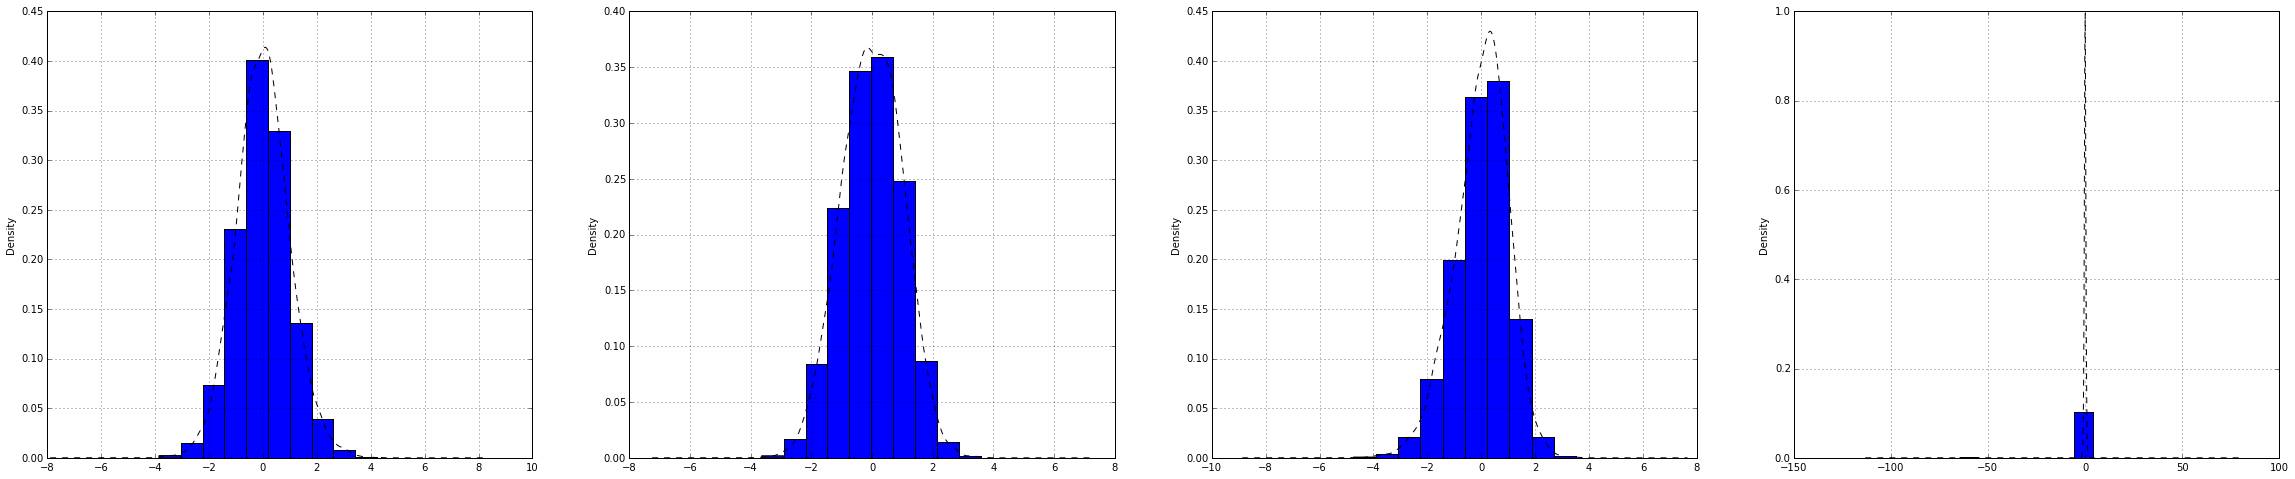

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40,8))

for i in range(3):
    X_all_pca[i].hist(ax=axes[i], normed=True)
    X_all_pca[i].plot(kind='kde',style='k--',ax=axes[i])
X_all_pca[37].hist(ax=axes[3], normed=True)
X_all_pca[37].plot(kind='kde',style='k--',ax=axes[3])
# 最后三个pca开始基本都是废的

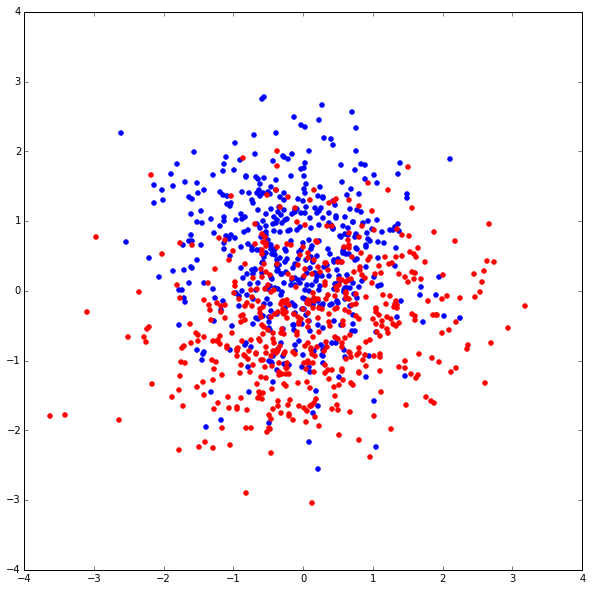

In [128]:
# 用头两个pca画一下分类情况，还是有比较明显的pattern的
fit, axes = plt.subplots(figsize=(10,10))
mask_0 = (y == 0)[0]
mask_1 = (y == 1)[0]
axes.scatter(X_pca[mask_0][0],X_pca[mask_0][1],color='blue')
axes.scatter(X_pca[mask_1][0],X_pca[mask_1][1],color='red')

###用PCA的结果放到SVM来分类
只用前12个PCA分量来预测. 这样可以减少一些不必要的noise

PCA只学习feature的pattern，因此take advantage了test data的feature信息(量很大，train的九倍)。所以比不经过这步preprocess的SVM效果好

In [461]:
pca = PCA(n_components=12,whiten=True)
pca.fit(X_all)
X_pca = pca.transform(X)
X_test_pca = pca.transform(X_test)
y_train = y.values.ravel()
print X_pca.shape
print y_train.shape

(1000, 12)
(1000,)


In [373]:
def test_svm(C_svm, gamma_svm):
    k_fold = cross_validation.KFold(len(X), n_folds=10)
    scores = []
    for train_indices, test_indices in k_fold:
        svc = svm.SVC(C=C_svm, kernel='rbf', gamma=gamma_svm)
        svc.fit(X_pca[train_indices], y_train[train_indices])
        score = svc.score(X_pca[test_indices], y_train[test_indices])
        scores.append(score)
    #print scores
    return sum(scores)/len(scores)

In [ ]:
gamma = 0.0
for C in arange(0.1,4.0,0.1):
    #for gamma in arange(0.00, 0.01,0.001):
         print "C=%f, gamma=%f, score=%f" % (C, gamma, test_svm(C,gamma))

In [ ]:
for C in arange(0.8,1.2,0.1):
    for gamma in arange(0.00, 1.00,0.1):
         print "C=%f, gamma=%f, score=%f" % (C, gamma, test_svm(C,gamma))

In [ ]:
C = 1.0
#for C in arange(1.0,1.2,0.1):
for gamma in arange(0.2, 0.4,0.01):
     print "C=%f, gamma=%f, score=%f" % (C, gamma, test_svm(C,gamma))

In [ ]:
# 用GridSearchCV来代替手动grid search
param_grid = {'C' : arange(0.1,4.0,0.1), 
              'gamma' : arange(0.0,1.0,0.05), 
              'kernel' : ['rbf']
             }
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid=param_grid, verbose=2,scoring='accuracy',cv=10,n_jobs=4).fit(X_pca, y_train)

In [484]:
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.956 (std: 0.010)
Parameters: {'kernel': 'rbf', 'C': 2.2000000000000002, 'gamma': 0.25}

Model with rank: 2
Mean validation score: 0.956 (std: 0.013)
Parameters: {'kernel': 'rbf', 'C': 2.5000000000000004, 'gamma': 0.25}

Model with rank: 3
Mean validation score: 0.955 (std: 0.016)
Parameters: {'kernel': 'rbf', 'C': 1.2000000000000002, 'gamma': 0.30000000000000004}

Model with rank: 4
Mean validation score: 0.955 (std: 0.016)
Parameters: {'kernel': 'rbf', 'C': 1.3000000000000003, 'gamma': 0.30000000000000004}

Model with rank: 5
Mean validation score: 0.955 (std: 0.017)
Parameters: {'kernel': 'rbf', 'C': 1.5000000000000002, 'gamma': 0.25}



In [379]:
svc = SVC(C=2.2, kernel='rbf', gamma=0.25)
svc.fit(X_pca, y_train)
result = svc.predict(X_test_pca)
print result.shape
df = DataFrame(result,index=range(1,9001),columns=['Solution'])
df.index.name = 'Id'
df.to_csv('pcaSVM.csv')

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.3,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [364]:
# 0.95266
# 对比裸SVM: 0.91973

### PCA + Random Forest

In [442]:
pca = PCA(n_components=12,whiten=True)
pca.fit(X_all)
X_pca = pca.transform(X)
X_test_pca = pca.transform(X_test)
y_train = y.values.ravel()
print X_pca.shape
print y_train.shape

(1000, 12)
(1000,)


In [487]:
# 直接用cv_score更简单
def test_rfc(n_est):
    clf=RandomForestClassifier(n_estimators=n_est, criterion='entropy', max_depth=5, min_samples_split=1, min_samples_leaf=3, max_features='auto', bootstrap=False, oob_score=False, n_jobs=4, random_state=33,verbose=0, min_density=None, compute_importances=None)
    scores = cross_val_score(clf, X_pca, y_train ,cv=10)
    return sum(scores)/len(scores)

In [488]:
test_rfc(1000)

0.85699999999999998

In [524]:
# 用GridSearchCV来代替手动grid search
param_grid = {'n_estimators' : arange(400,700,100),
              #'criterion' : ['entropy'],
              'criterion' : ['gini'],
              #'max_depth' : arange(2,7,1),
              #'min_samples_split': arange(2,3,1),
              #'min_samples_leaf' : arange(1,2,1),
             }
clf = RandomForestClassifier(bootstrap=False, oob_score=False, random_state=33)
grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=0,scoring='accuracy',cv=10,n_jobs=4).fit(X_pca, y_train)

In [505]:
# random forest在这里面纯用pca结果效果没有SVM好，找不出来一组特别好的参数
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.920 (std: 0.028)
Parameters: {'min_samples_split': 2, 'n_estimators': 400, 'criterion': 'gini', 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.918 (std: 0.028)
Parameters: {'min_samples_split': 1, 'n_estimators': 500, 'criterion': 'gini', 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.917 (std: 0.026)
Parameters: {'min_samples_split': 2, 'n_estimators': 600, 'criterion': 'gini', 'min_samples_leaf': 1}

Model with rank: 4
Mean validation score: 0.917 (std: 0.029)
Parameters: {'min_samples_split': 2, 'n_estimators': 600, 'criterion': 'gini', 'min_samples_leaf': 2}

Model with rank: 5
Mean validation score: 0.915 (std: 0.031)
Parameters: {'min_samples_split': 2, 'n_estimators': 500, 'criterion': 'gini', 'min_samples_leaf': 1}



### GMM
观察发现每个分量不是严格Gaussian，所以总的分布不是muti-variate Gaussian，tail部分有一些扭曲，中间部分比较fit

可以利用Gaussian Mixture Model来fit这种偏离

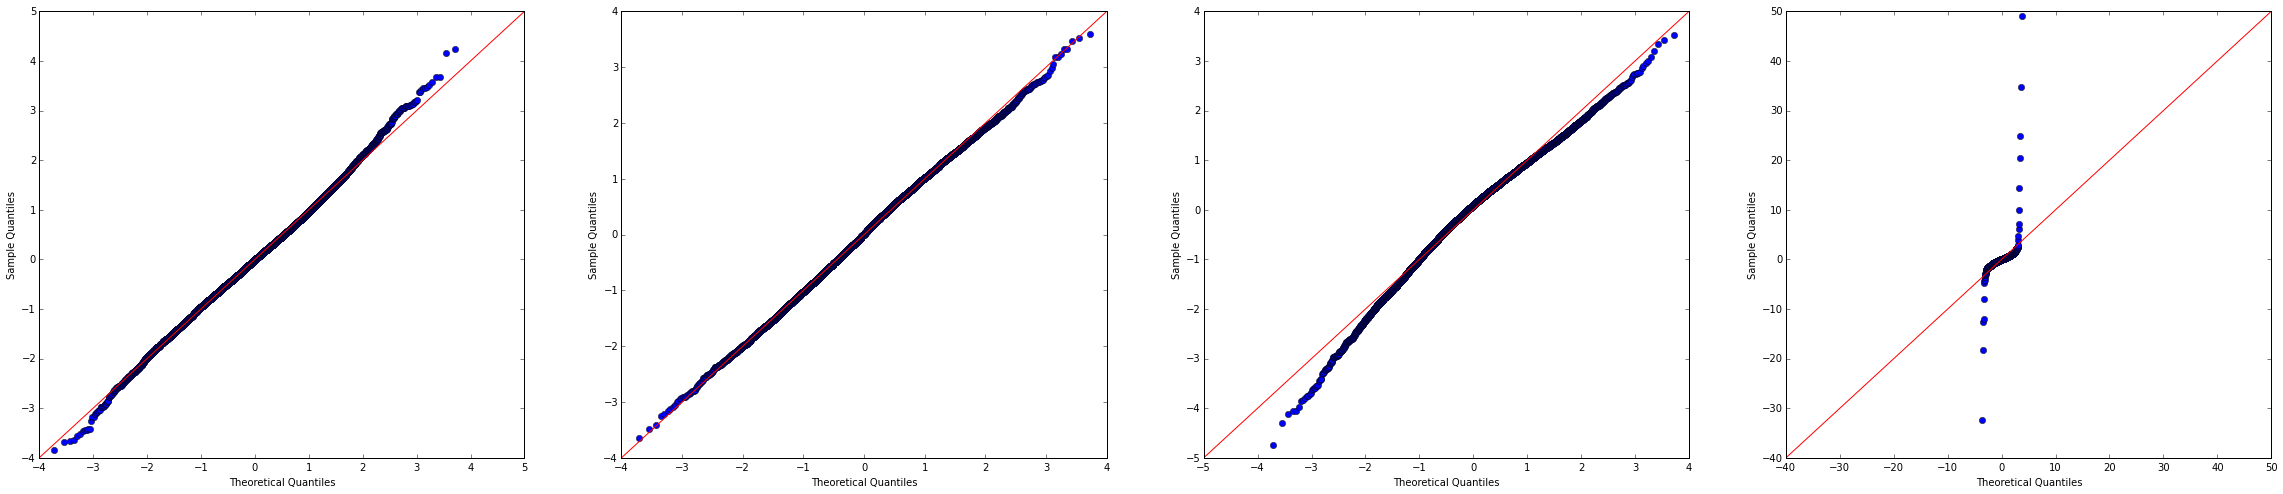

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40,8))

for i in range(3):
    sm.qqplot(X_all_pca[i], fit=True, line='45', ax=axes[i])
sm.qqplot(X_all_pca[39], fit=True, line='45', ax=axes[3])

plt.show()


In [528]:
# 官网GMM model selection
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X_all_pca)
        bic.append(gmm.bic(X_all_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

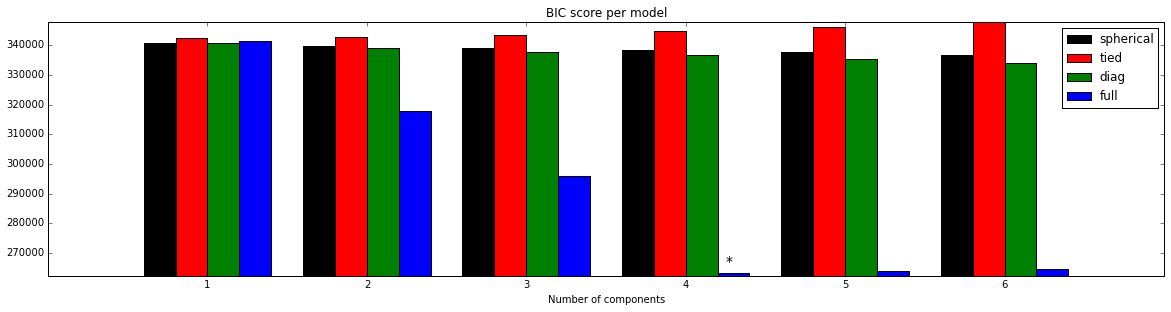

In [532]:
bic = np.array(bic)
color_iter = ['k', 'r', 'g', 'b', 'c', 'm', 'y']
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [541]:
# 选择4个GMM component, 'full' covariance type来fit GMM model
gmm = best_gmm.fit(X_all_pca)
X_pca_gmm = gmm.predict_proba(X_pca)
X_test_pca_gmm = gmm.predict_proba(X_test_pca)
print X_pca_gmm.shape
print X_test_pca_gmm.shape

(array([ 754.,    1.,    1.,    0.,    2.,    0.,    1.,    0.,    2.,  239.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

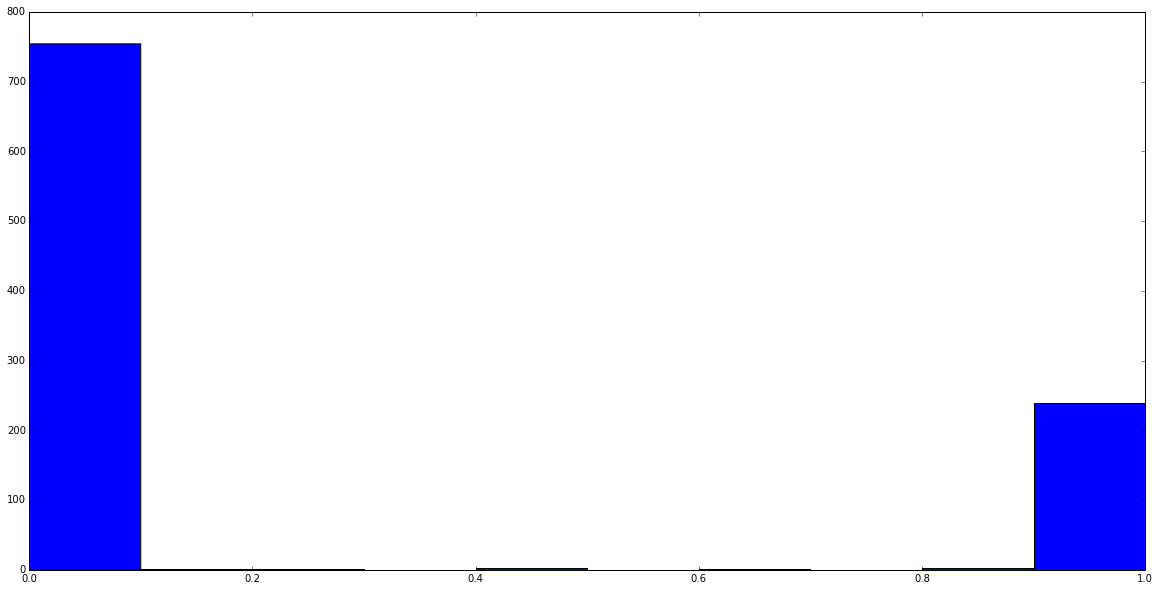

In [551]:
# 每个数据点的GMM归属非常非常明确，用这个class prob去train SVM
hist(X_pca_gmm[:,0])

In [599]:
# 用GridSearchCV来代替手动grid search
param_grid = {'C' : arange(0.008,0.011,0.001), 
              'gamma' : arange(0.0,0.01,0.001), 
              'kernel' : ['rbf']
             }
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid=param_grid, verbose=0,scoring='accuracy',cv=10,n_jobs=4).fit(X_pca_gmm, y_train)

In [600]:
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.996 (std: 0.007)
Parameters: {'kernel': 'rbf', 'C': 0.0080000000000000002, 'gamma': 0.0}

Model with rank: 2
Mean validation score: 0.996 (std: 0.007)
Parameters: {'kernel': 'rbf', 'C': 0.0090000000000000011, 'gamma': 0.0}

Model with rank: 3
Mean validation score: 0.996 (std: 0.007)
Parameters: {'kernel': 'rbf', 'C': 0.010000000000000002, 'gamma': 0.0}

Model with rank: 4
Mean validation score: 0.510 (std: 0.000)
Parameters: {'kernel': 'rbf', 'C': 0.0080000000000000002, 'gamma': 0.001}

Model with rank: 5
Mean validation score: 0.510 (std: 0.000)
Parameters: {'kernel': 'rbf', 'C': 0.0080000000000000002, 'gamma': 0.002}



In [559]:
# 直接用cv_score更简单
def test_svm(C_svm, gamma_svm):
    svc = svm.SVC(C=C_svm, kernel='rbf', gamma=gamma_svm)
    scores = cross_val_score(svc, X_pca_gmm, y_train,cv=10)
    return sum(scores)/len(scores)

In [601]:
test_svm(0.01,0.0)

0.99600000000000011

In [602]:
svc = SVC(C=0.01, kernel='rbf', gamma=0.0)
svc.fit(X_pca_gmm, y_train)
result = svc.predict(X_test_pca_gmm)
print result.shape
df = DataFrame(result,index=range(1,9001),columns=['Solution'])
df.index.name = 'Id'
df.to_csv('pca_GMM_SVM.csv')

(9000,)


In [ ]:
# 0.99208

### GMM + PCA + RandomForest

In [613]:
# 直接用cv_score更简单
def test_rfc(n_est):
    clf=RandomForestClassifier(n_estimators=n_est, criterion='gini', max_depth=2, min_samples_split=1, min_samples_leaf=1, max_features='auto', bootstrap=False, oob_score=False, n_jobs=4, random_state=33,verbose=0, min_density=None, compute_importances=None)
    scores = cross_val_score(clf, X_pca_gmm, y_train ,cv=10)
    return sum(scores)/len(scores)

In [615]:
test_rfc(800)

0.99500000000000011

In [611]:
# 用GridSearchCV来代替手动grid search
param_grid = {'n_estimators' : arange(800,900,100),
              'criterion' : ['entropy'],
              #'criterion' : ['gini'],
              'max_depth' : arange(2,5,1),
              'min_samples_split': arange(1,2,1),
              'min_samples_leaf' : arange(1,2,1),
             }
clf = RandomForestClassifier(bootstrap=False, oob_score=False, random_state=33)
grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=0,scoring='accuracy',cv=10,n_jobs=4).fit(X_pca_gmm, y_train)

In [608]:
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.995 (std: 0.007)
Parameters: {'n_estimators': 800, 'criterion': 'gini', 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.995 (std: 0.007)
Parameters: {'n_estimators': 900, 'criterion': 'gini', 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.995 (std: 0.007)
Parameters: {'n_estimators': 1000, 'criterion': 'gini', 'max_depth': 2}

Model with rank: 4
Mean validation score: 0.995 (std: 0.007)
Parameters: {'n_estimators': 800, 'criterion': 'gini', 'max_depth': 3}

Model with rank: 5
Mean validation score: 0.995 (std: 0.007)
Parameters: {'n_estimators': 800, 'criterion': 'gini', 'max_depth': 4}



In [619]:
clf=RandomForestClassifier(n_estimators=800, criterion='gini', max_depth=2, min_samples_split=1, min_samples_leaf=1, max_features='auto', bootstrap=False, oob_score=False, n_jobs=4, random_state=33,verbose=0, min_density=None, compute_importances=None)
clf.fit(X_pca_gmm,y_train)
result = clf.predict(X_test_pca_gmm)
print result.shape
df = DataFrame(result,index=range(1,9001),columns=['Solution'])
df.index.name = 'Id'
df.to_csv('pca_GMM_RF.csv')

(9000,)


In [620]:
# 0.99113
# 和SVM差不多